<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/%ED%86%B5%EA%B3%84%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계 기초

In [2]:
import numpy as np
from scipy import stats

In [3]:
data = np.random.randint(0,100,1000)
data

array([26, 41, 59, 54, 61, 29, 35,  7, 55, 83, 69, 33, 21, 32, 35, 54,  6,
       72, 97, 88, 56, 52, 77, 64, 73, 45, 30, 98, 29, 15, 13, 24, 51,  4,
       15, 97, 78, 44, 38, 38, 12, 35, 90, 26, 29, 31, 32, 12, 69,  2, 83,
       47, 46, 86, 28, 64,  3, 69, 97, 35, 33, 27, 24,  3,  9, 43, 58, 82,
        2, 79, 79, 93, 59, 67, 66, 16,  0,  1, 37, 43, 25, 27,  0,  8, 83,
       48, 94,  7, 69, 83, 83, 81, 86, 25, 78, 55, 12, 24, 55, 71, 26, 69,
       47,  6, 65, 47, 41, 63,  2, 96,  0,  6, 57, 34, 44,  4, 88, 94, 48,
       75, 34, 56, 56, 20, 58,  0, 97, 24, 49, 16, 32, 22, 53, 43, 71, 82,
        0,  5, 10, 56, 86,  6, 24, 87, 51, 89, 43, 47, 31, 87, 66, 71, 88,
       75, 96, 59, 61,  0, 21, 55, 55,  0, 59, 31, 93, 12, 96, 72, 33,  4,
        4,  6, 11, 53, 72, 55, 89, 73, 96, 11, 28, 82,  7, 22, 27, 51, 62,
       59, 12, 39, 78, 30, 10, 20, 56, 93, 23, 36, 90, 58, 15, 66, 40, 86,
       28, 57, 12, 56, 51, 88, 66, 92, 43, 69, 53, 45, 27, 28, 78, 37, 27,
       55, 72, 37, 66, 97

In [5]:
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)

print(mean)
print(median)
print(mode[0][0], mode[1][0])

48.119
47.0
47 18


<ipython-input-5-fff1efbf9537>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(data)


# 통계 개념

In [6]:
from statistics import variance, stdev
data = np.random.randint(0,100,30)
data

array([87, 77, 68,  0, 65, 87, 69, 84, 74, 96,  0, 52, 24, 23, 46, 20,  5,
       59, 51, 58, 91, 32, 49, 71, 42, 60, 94, 78, 23, 30])

In [9]:
var = variance(data)
var#분산

818

In [10]:
std = stdev(data)
std#표준편차

28.600699292150182

In [11]:
range_ = max(data) - min(data)
range_ #범위

96

In [13]:
for index, temp in enumerate(range(0,101,25)):
    print(index+1,'사분위 : ',np.percentile(data,temp))

1 사분위 :  0.0
2 사분위 :  30.5
3 사분위 :  58.5
4 사분위 :  76.25
5 사분위 :  96.0


In [14]:
iqr = np.percentile(data,75) - np.percentile(data,25)
iqr

45.75

# 가설 검정

## T - 검정

In [15]:
#성별간 성적 차이가 있는지 분석 -> 독립푠본 T 검정
#귀무가설 : 성별과 성적차이가 없을 것이다.
#대립가설 : 성별과 성적차이가 있을 것이다.
import pandas as pd
import scipy.stats as stats

df = pd.read_csv('/content/student-mat.csv')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [17]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<Axes: xlabel='sex'>

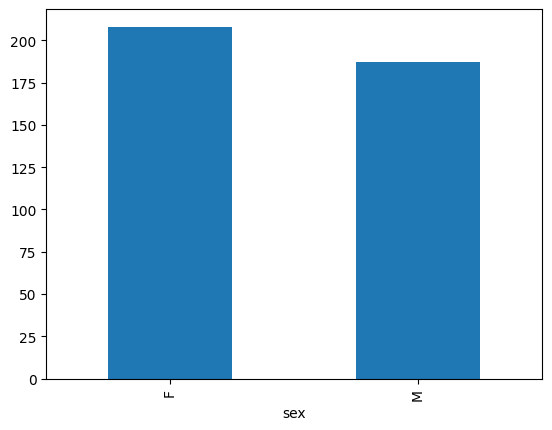

In [19]:
df_sex = df.value_counts('sex')
df_sex.plot.bar()

In [20]:
exam = df[['sex','G1','G2','G3']]
exam

,sex,G1,G2,G3
0,F,5,6,6
1,F,5,5,6
2,F,7,8,10
3,F,15,14,15
4,F,6,10,10
...,...,...,...,...
390,M,9,9,9
391,M,14,16,16
392,M,10,8,7
393,M,11,12,10


In [21]:
mdata = exam[exam['sex']=='M']
fdata = exam[exam['sex']=='F']

In [22]:
mdata

,sex,G1,G2,G3
5,M,15,15,15
6,M,12,12,11
8,M,16,18,19
9,M,14,15,15
12,M,14,14,14
...,...,...,...,...
390,M,9,9,9
391,M,14,16,16
392,M,10,8,7
393,M,11,12,10


In [23]:
fdata

,sex,G1,G2,G3
0,F,5,6,6
1,F,5,5,6
2,F,7,8,10
3,F,15,14,15
4,F,6,10,10
...,...,...,...,...
385,F,10,9,10
386,F,6,5,6
387,F,7,5,0
388,F,7,9,8


In [24]:
stats.ttest_ind(mdata['G1'], fdata['G1'], equal_var = True)
#pvalue=0.06825227168840965 -> pvalue가 0.05보다 크니까 귀무가설 성립(성별과 성적에 관한 차이 없음)

Ttest_indResult(statistic=1.8283673434285317, pvalue=0.06825227168840965)

In [25]:
stats.ttest_ind(mdata['G2'], fdata['G2'], equal_var = True)
#0.07051474229682834 -> pvalue가 0.05보다 크니까 귀무가설 성립(성별과 성적에 관한 차이 없음)

Ttest_indResult(statistic=1.8135169726008138, pvalue=0.07051474229682834)

In [26]:
stats.ttest_ind(mdata['G3'], fdata['G3'], equal_var = True)
#pvalue=0.039865332341527636 -> pvalue가 0.05보다 작

Ttest_indResult(statistic=2.061992815503971, pvalue=0.039865332341527636)

In [28]:
# 귀무가설 : 귤 1개의 무게는 100g 이상일 것이다.

mu = 100
mean = 95
sigma = 3
n = 15

In [30]:
# 단일 표본 t검증
# t통계랑 구하기
t_s = (mean - mu) / (sigma/np.sqrt(float(n)))
t_s

-6.454972243679028

In [31]:
t_point = stats.t.ppf(0.05, n-1)
t_point

-1.7613101357748564

In [33]:
p_value = stats.t.sf(np.abs(t_s),n-1)
p_value # 0.05보다 작은 값이므로 귀무가설 기각

7.550831240071052e-06

## 정규 분포

In [38]:
# 수학 시험이 정규분포를 따를 때 평균점수 63점 표준편차 12점인 경우 80점 이상인 학생의 비율은?
s = 80
mean = 63
sigma = 12

In [39]:
result = (s-mean) / sigma
result

1.4166666666666667

In [40]:
p_val = 1 - stats.norm.cdf(result)
p_val = p_val*100
p_val

7.829020354481742